# Homework 2
## Part I: Life Insurance
### (a)
The coefficient on the constant represents the estimated life insurance holdings (lins) for someone with an income of $0.

The coefficient on income represents the estimated increase (thousands of $) in lins per increase of $1000 in income.

The value for $\beta_0 + \beta_1 x_0$ represents the estimated lins for someone with an income of $x_0$

The value for $R^2$ represents how much of the variation in lins can be attributed to variation in income.

### (b)
The version of this for population is pretty much the same, except for the stochastic error term

$lins = 6.5855 + 3.880 x_0 + \epsilon$

The error term is definitely a lot of things, since there are clearly more inputs to someone's life insurance policy than just their income. Some possible things could be: number of children/dependents, is the subject a smoker/drinker, automobile accident history, etc.

### (c)
Bias refers to the tendency of the model to fit data to a pre-selected trend. I would say that this model is very biased, because this model assumes that the shape of the relationship between life insurance and income is perfectly linear. There is an inherent tradeoff between the bias and test variance of a model, since more biased models tend to get better $R^2$ results, yet are more likely to fit the trend to the wrong shape. The assumptions we made in this one are that: 

- The relationship between life insurance and income is perfectly linear
- The only input that determines life insurance is income

I don't think either of these assumptions hold up in real life, because if it did then life insurance would definitely not be as complicated as it actually is.

## Part II: Determinants of Wages

### Step 1
N/A 

### Step 2
I would expect that all the coefficients would be positive, since education and experience both help you get better jobs. And even without any education/experience, no job will pay a negative wage (the constant term).

### Step 3
N/A (included in next code)

### Step 4



In [67]:
import pandas as pd

import statsmodels.api as sm
import numpy as np

import matplotlib.pyplot as plt

df = pd.read_csv("cps85.txt", delimiter="\t")

df["lnwage"] = np.log2(df["wage"])
df["exp"] = df["age"] - df["ed"] - 6
df["exp2"] = df["exp"] ** 2

#print(df)

x = sm.add_constant(df[["ed", "exp", "exp2"]])

res = sm.OLS(df["lnwage"], x).fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 lnwage   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     54.89
Date:                Sun, 14 Feb 2021   Prob (F-statistic):           6.53e-31
Time:                        17:19:51   Log-Likelihood:                -542.97
No. Observations:                 534   AIC:                             1094.
Df Residuals:                     530   BIC:                             1111.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3573      0.181     40.725      0.0

### Step 5
The magnitudes of the t-values are all reasonably high. From the t-statistics, we can say that the coefficients are significant.

### Step 6
The p-values are all exactly 0, which is really good. Like the t-statistics, the p-values are suggesting that the coefficients are significant.

### Step 7


In [68]:
print(res.fvalue)

54.893337195348764


The f value of about 55 also suggests that the coefficients are significant

### Step 8
By looking at different properties/derivations of the OLS (p value, t test, f value), we determined that education, experience, and experience2 are all significant factors in determining LNWAGE. 

### Step 9
#### (a)
The residuals do have a mean of approximately 0.
#### (b)
You can't really tell anything about the residuals from the scatter plots

#### (c)
The histogram definitely looks like a proper normal distribution.

#### (d)
Both correlations seemed nonexistant, at least when I used OLS to compute them (the results are printed below)

#### (e)
Besides the obvious correlation between exp and exp2, I was surprised to see that there wasn't a strong correlation between ed and exp. I thought it would be perfectly 1, since we derived exp from ed and age. I was surprised by that result. From that matrix, I have no reason to suspect multicollinearity.

-1.3868224088875739e-14


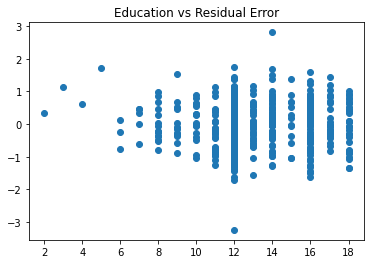

In [69]:
y_pred = res.predict(x)
y_true = df["lnwage"]

residual = y_true - y_pred
print(np.mean(residual))

plt.title("Education vs Residual Error")
plt.plot(df["ed"], residual, "o")
plt.show()

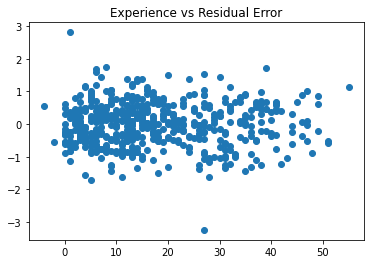

In [70]:
plt.title("Experience vs Residual Error")
plt.plot(df["exp"], residual, "o")
plt.show()

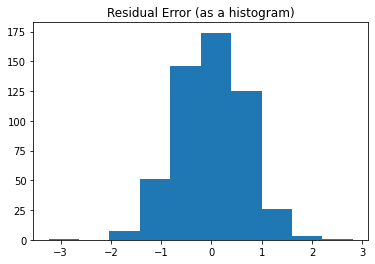

In [71]:
plt.title("Residual Error (as a histogram)")
plt.hist(residual)
plt.show()

In [72]:
res2 = sm.OLS(residual, df["ed"]).fit()
res3 = sm.OLS(residual, df["exp"]).fit()
print(res2.summary())
print(res3.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                  -0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.002
Method:                 Least Squares   F-statistic:                         -6.341e-14
Date:                Sun, 14 Feb 2021   Prob (F-statistic):                        1.00
Time:                        17:19:52   Log-Likelihood:                         -542.97
No. Observations:                 534   AIC:                                      1088.
Df Residuals:                     533   BIC:                                      1092.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [73]:
print(df[["ed", "exp", "exp2"]].corr())

            ed       exp      exp2
ed    1.000000 -0.358121 -0.376523
exp  -0.358121  1.000000  0.955487
exp2 -0.376523  0.955487  1.000000


### Step 10
It definitely looks like being female hurts your expected LNWAGE. Marital status has both a low coefficient and a high-ish p-value, so it doesn't affect lnwage as much. To test regional differences in minimum wage, I would go and number every county in my search region, and that number as a predictor.

In [74]:
x = sm.add_constant(df[["fe", "marr", "ed", "exp", "exp2"]])

res = sm.OLS(df["lnwage"], x).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 lnwage   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     44.70
Date:                Sun, 14 Feb 2021   Prob (F-statistic):           1.81e-38
Time:                        17:19:52   Log-Likelihood:                -520.97
No. Observations:                 534   AIC:                             1054.
Df Residuals:                     528   BIC:                             1080.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4574      0.175     42.596      0.0